# Directors 

# 1. Import Data 

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
#import data then merge to dataframes 
bom_movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
tmbd = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
princi_title=pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
title_b =pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
movies =pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

In [13]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [14]:
names_plane = name_basics.loc[name_basics.duplicated(subset=['primary_name'],keep=False) == True]
names_plane

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
10,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162"
40,nm0074445,Jean-François Bergeron,NaN,NaN,"editor,editorial_department,actor","tt0373788,tt1316624,tt0123376,tt0479647"
45,nm0077024,Daniel Bernstein,NaN,NaN,"composer,sound_department","tt0192199,tt0284915,tt8369780,tt1528813"
46,nm0077067,Jamie Bernstein,1952.0,NaN,"director,actress,writer","tt6644530,tt3909442,tt4601198,tt0082329"
...,...,...,...,...,...,...
606612,nm9964916,Rich Allen,NaN,NaN,"director,actor,writer",NaN
606616,nm9969409,Robert Jones,NaN,NaN,"actor,composer",tt8559614
606620,nm9971456,Zheng Wei,NaN,NaN,director,NaN
606634,nm9985863,Gary Evans,NaN,NaN,producer,"tt0306913,tt8726188"


In [15]:
id_dir =  name_basics.loc[name_basics.duplicated(subset=['nconst'],keep=False) == True]
id_dir

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles


In [16]:
name_basics = name_basics.drop_duplicates(subset=['primary_name'], keep=False,)

In [17]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
...,...,...,...,...,...,...
606642,nm9990296,Fleurette Dicaire,NaN,NaN,NaN,tt8319420
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [18]:
title_p.columns.str.replace(' ', '')
princi_title.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [20]:
princi_title = princi_title.sort_values(by=['nconst'])
princi_title.head()

,tconst,ordering,nconst,category,job,characters
263152,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]"
15288,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]"
223302,tt0858500,2,nm0000002,actress,NaN,"[""May""]"
252036,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]"
229763,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]"


In [22]:
names_descript = pd.merge(
    princi_title,
    name_basics,
    how='inner',
    on ='nconst')
names_descript.head(30)

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
1,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
2,tt0858500,2,nm0000002,actress,NaN,"[""May""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
3,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
4,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
5,tt2004245,1,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
6,tt4323536,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
7,tt2327430,2,nm0000005,archive_footage,NaN,"[""Himself""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
8,tt2056773,1,nm0000005,archive_footage,NaN,NaN,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
9,tt9209768,1,nm0000005,self,NaN,"[""Himself (voice)""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"


In [26]:
directors = names_descript[names_descript["primary_profession"].str.contains('director|director', na=False)]

In [27]:
directors.head()


,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
7,tt2327430,2,nm0000005,archive_footage,NaN,"[""Himself""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
8,tt2056773,1,nm0000005,archive_footage,NaN,NaN,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
9,tt9209768,1,nm0000005,self,NaN,"[""Himself (voice)""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
10,tt8385142,2,nm0000005,archive_footage,NaN,"[""Himself""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
11,tt6109168,1,nm0000005,archive_footage,NaN,"[""Himself""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"


In [28]:
directors = directors[directors['birth_year'] > 1939]
directors.sort_values(by=['birth_year'])

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
137442,tt4664460,3,nm0671721,actor,NaN,NaN,Austin Pendleton,1940.0,NaN,"actor,director,writer","tt0079588,tt0091949,tt0266543,tt0104952"
6587,tt3891538,2,nm0001001,actor,NaN,"[""Grandpa""]",James Caan,1940.0,NaN,"actor,soundtrack,director","tt0100157,tt0073631,tt0083190,tt0068646"
6588,tt5321174,3,nm0001001,actor,NaN,"[""Tap""]",James Caan,1940.0,NaN,"actor,soundtrack,director","tt0100157,tt0073631,tt0083190,tt0068646"
6589,tt6874254,4,nm0001001,actor,NaN,"[""Col Tom Rockwell""]",James Caan,1940.0,NaN,"actor,soundtrack,director","tt0100157,tt0073631,tt0083190,tt0068646"
6590,tt10302982,3,nm0001001,actor,NaN,"[""Tap Peterson""]",James Caan,1940.0,NaN,"actor,soundtrack,director","tt0100157,tt0073631,tt0083190,tt0068646"
...,...,...,...,...,...,...,...,...,...,...,...
873130,tt4980576,3,nm8395992,actor,NaN,"[""Andrey""]",Andrey Gromov,2004.0,NaN,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"
873133,tt5709892,5,nm8395992,producer,producer,NaN,Andrey Gromov,2004.0,NaN,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"
873132,tt5927488,2,nm8395992,actor,NaN,"[""Boy""]",Andrey Gromov,2004.0,NaN,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"
873121,tt5546274,1,nm8395992,actor,NaN,"[""Vote""]",Andrey Gromov,2004.0,NaN,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,directors,writers
0,1.0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",NaN,NaN,NaN
2,3.0,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN
3,4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",NaN,NaN,NaN
4,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
146239,NaN,NaN,NaN,NaN,NaN,NaN,tt8999974,nm10122357,nm10122357
146240,NaN,NaN,NaN,NaN,NaN,NaN,tt9001390,nm6711477,nm6711477
146241,NaN,NaN,NaN,NaN,NaN,NaN,tt9001494,"nm10123242,nm10123248",NaN
146242,NaN,NaN,NaN,NaN,NaN,NaN,tt9004986,nm4993825,nm4993825


In [31]:
names_descript = pd.merge(
    directors,
    ratings,
    how='inner',
    on ='tconst')
names_descript

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt5847740,4,nm0000087,actress,NaN,NaN,Elena Koreneva,1953.0,NaN,"actress,casting_director","tt7529350,tt0122969,tt5847740,tt0123138",4.8,29
1,tt5847740,7,nm0030336,producer,producer,NaN,Andrey Annenskiy,1983.0,NaN,"producer,actor,director","tt0110857,tt5847740,tt4940422,tt3817188",4.8,29
2,tt5847740,5,nm2204054,director,NaN,NaN,Vladimir Mirzoev,1957.0,NaN,"director,writer","tt5159302,tt1194603,tt3240014,tt0780071",4.8,29
3,tt7529350,3,nm0000087,actress,NaN,"[""Irina""]",Elena Koreneva,1953.0,NaN,"actress,casting_director","tt7529350,tt0122969,tt5847740,tt0123138",6.3,129
4,tt7529350,5,nm0515360,director,NaN,NaN,Sergey Livnev,1964.0,NaN,"producer,writer,director","tt7529350,tt0111128,tt0143907,tt0102206",6.3,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,tt8361898,1,nm9808852,actor,NaN,"[""Riccardo Vecchione""]",Riccardo Vecchione,1973.0,NaN,"director,writer,producer","tt9617588,tt8361898",8.4,13
48936,tt8752420,5,nm9822023,director,NaN,NaN,Jorge Tudanca,1999.0,NaN,"director,writer,actor","tt9361888,tt8752420,tt8382210,tt9784954",8.4,10
48937,tt5925772,6,nm9847953,writer,creator,NaN,Issabella Darville,1999.0,NaN,"writer,casting_director,cinematographer","tt5925772,tt8238156,tt8129908,tt5157616",6.6,1956
48938,tt8622286,1,nm9936604,actor,NaN,NaN,Ujwal Adhikari,1999.0,NaN,"actor,casting_director","tt8275366,tt8622286,tt8967956",6.4,13


In [33]:
names_descript.columns.str.replace(', ', '')
names_descript.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt5847740,4,nm0000087,actress,NaN,NaN,Elena Koreneva,1953.0,NaN,"actress,casting_director","tt7529350,tt0122969,tt5847740,tt0123138",4.8,29
1,tt5847740,7,nm0030336,producer,producer,NaN,Andrey Annenskiy,1983.0,NaN,"producer,actor,director","tt0110857,tt5847740,tt4940422,tt3817188",4.8,29
2,tt5847740,5,nm2204054,director,NaN,NaN,Vladimir Mirzoev,1957.0,NaN,"director,writer","tt5159302,tt1194603,tt3240014,tt0780071",4.8,29
3,tt7529350,3,nm0000087,actress,NaN,"[""Irina""]",Elena Koreneva,1953.0,NaN,"actress,casting_director","tt7529350,tt0122969,tt5847740,tt0123138",6.3,129
4,tt7529350,5,nm0515360,director,NaN,NaN,Sergey Livnev,1964.0,NaN,"producer,writer,director","tt7529350,tt0111128,tt0143907,tt0102206",6.3,129


In [34]:
names_descript= names_descript.drop(['ordering', 'job', 'characters', 'death_year', 'known_for_titles'], axis=1)
names_descript

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt5847740,nm0000087,actress,Elena Koreneva,1953.0,"actress,casting_director",4.8,29
1,tt5847740,nm0030336,producer,Andrey Annenskiy,1983.0,"producer,actor,director",4.8,29
2,tt5847740,nm2204054,director,Vladimir Mirzoev,1957.0,"director,writer",4.8,29
3,tt7529350,nm0000087,actress,Elena Koreneva,1953.0,"actress,casting_director",6.3,129
4,tt7529350,nm0515360,director,Sergey Livnev,1964.0,"producer,writer,director",6.3,129
...,...,...,...,...,...,...,...,...
48935,tt8361898,nm9808852,actor,Riccardo Vecchione,1973.0,"director,writer,producer",8.4,13
48936,tt8752420,nm9822023,director,Jorge Tudanca,1999.0,"director,writer,actor",8.4,10
48937,tt5925772,nm9847953,writer,Issabella Darville,1999.0,"writer,casting_director,cinematographer",6.6,1956
48938,tt8622286,nm9936604,actor,Ujwal Adhikari,1999.0,"actor,casting_director",6.4,13


In [35]:
names_descript = names_descript[names_descript["category"].str.contains('director|director', na=False)]
names_descript

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
2,tt5847740,nm2204054,director,Vladimir Mirzoev,1957.0,"director,writer",4.8,29
4,tt7529350,nm0515360,director,Sergey Livnev,1964.0,"producer,writer,director",6.3,129
7,tt4254562,nm0514879,director,Nadia Litz,1976.0,"actress,director,writer",5.0,159
11,tt4393278,nm3550361,director,Sarik Andreasyan,1984.0,"producer,director,writer",4.5,1190
13,tt1961604,nm0052442,director,Stephen K. Bannon,1953.0,"producer,director,writer",2.2,1875
...,...,...,...,...,...,...,...,...
48923,tt7844164,nm9539414,director,Roman Perfilyev,1985.0,"director,writer,producer",5.6,38
48924,tt7866188,nm9550754,director,Zita Erffa,1986.0,"director,writer,editor",7.4,52
48931,tt8118944,nm9687034,director,Pavlina Ivanova,1975.0,"director,writer",9.7,32
48934,tt8259916,nm9762716,director,Matt Horton,2000.0,"director,writer",8.9,658


In [64]:
names_descript['Popularity_Ratings'] = names_descript['averagerating'] * names_descript['numvotes']
names_descript.sort_values(by=['Popularity_Ratings'],ascending=False)

<ipython-input-64-52fb35f770a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_descript['Popularity_Ratings'] = names_descript['averagerating'] * names_descript['numvotes']


,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes,popularity_&_rating,Popularity/Ratings,Popularity_Ratings
4732,tt1375666,nm0634240,director,Christopher Nolan,1970.0,"writer,producer,director",8.8,1841066,16201380.8,16201380.8,16201380.8
19699,tt1345836,nm0634240,director,Christopher Nolan,1970.0,"writer,producer,director",8.4,1387769,11657259.6,11657259.6,11657259.6
27659,tt0816692,nm0634240,director,Christopher Nolan,1970.0,"writer,producer,director",8.6,1299334,11174272.4,11174272.4,11174272.4
33422,tt0848228,nm0923736,director,Joss Whedon,1964.0,"writer,producer,director",8.1,1183655,9587605.5,9587605.5,9587605.5
669,tt0993846,nm0000217,director,Martin Scorsese,1942.0,"producer,director,actor",8.2,1035358,8489935.6,8489935.6,8489935.6
...,...,...,...,...,...,...,...,...,...,...,...
13949,tt5364390,nm0158427,director,Derek Chiu,1961.0,"director,writer,producer",2.0,5,10.0,10.0,10.0
45328,tt5935758,nm3062127,director,Geno McGahee,1974.0,"writer,producer,director",2.0,5,10.0,10.0,10.0
43852,tt8476266,nm2508880,director,Ján Novák,1966.0,"director,writer,editor",1.5,6,9.0,9.0,9.0
38904,tt6153116,nm1512437,director,Maria Ramos,1964.0,"director,writer,producer",1.0,7,7.0,7.0,7.0


In [69]:
director_ratings = names_descript.drop(['tconst','nconst','category','birth_year','primary_profession','averagerating','numvotes','popularity_&_rating','Popularity/Ratings'], axis=1)
director_ratings.sort_values(by=['Popularity_Ratings'],ascending=False)

,primary_name,Popularity_Ratings
4732,Christopher Nolan,16201380.8
19699,Christopher Nolan,11657259.6
27659,Christopher Nolan,11174272.4
33422,Joss Whedon,9587605.5
669,Martin Scorsese,8489935.6
...,...,...
13949,Derek Chiu,10.0
45328,Geno McGahee,10.0
43852,Ján Novák,9.0
38904,Maria Ramos,7.0


In [71]:
directors_rank = director_ratings.groupby(by=['primary_name']).agg(['mean','count'],as_index=False)
directors_rank = directors_rank.rename(columns={'mean':'Popularity_Ratings','count':'count'})
directors_rank.columns = directors_rank.columns.droplevel(0)
directors_rank = directors_rank.sort_values(by=['Popularity_Ratings'],ascending=False)
directors_rank

,Popularity_Ratings,count
primary_name,,
Christopher Nolan,1.067972e+07,4
Joss Whedon,4.852477e+06,3
David Fincher,4.523357e+06,3
James Gunn,3.960186e+06,3
Chris Buck,3.877485e+06,1
...,...,...
Daisuke Yamanouchi,1.660000e+01,4
Henrik Normann,1.600000e+01,1
Ping Ho,1.320000e+01,1


In [106]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [107]:
top_10_dir = directors_rank.head(10)
top_10_dir

,Popularity_Ratings,count
primary_name,,
Christopher Nolan,10679723.70,4
Joss Whedon,4852476.57,3
David Fincher,4523356.60,3
James Gunn,3960186.50,3
Chris Buck,3877485.00,1
Patty Jenkins,3656452.50,1
Matthew Vaughn,3557716.60,4
Sam Mendes,3508175.50,2
Damien Chazelle,3206804.20,3


<function matplotlib.pyplot.show(close=None, block=None)>

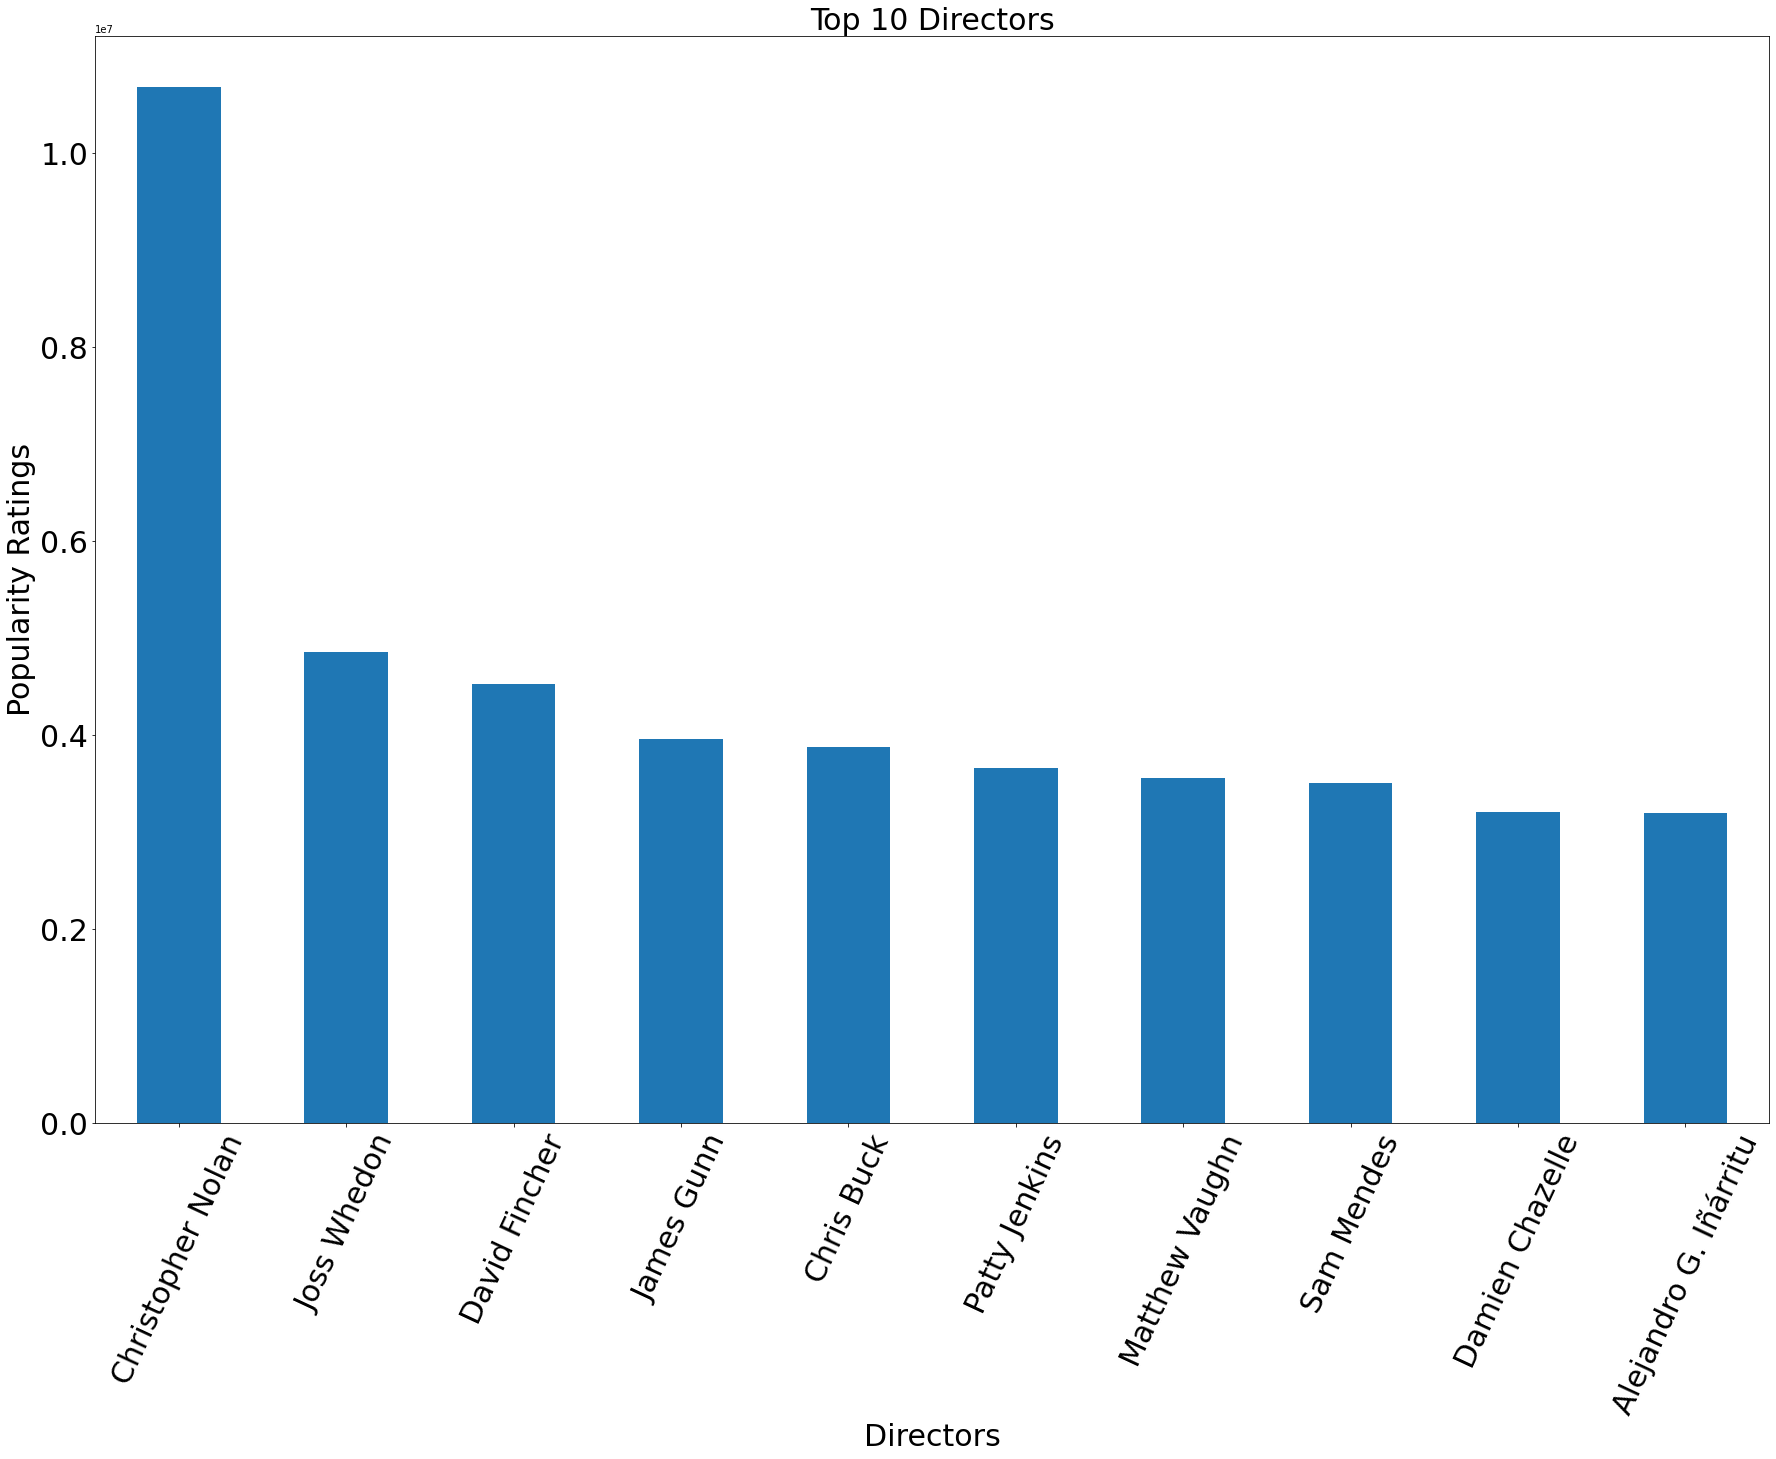

In [116]:
from matplotlib import pyplot as plt
top_10_dir['Popularity_Ratings'].plot(kind="bar",figsize=(30, 20),fontsize=30)

plt.title("Top 10 Directors",fontsize=30)
plt.ylabel("Popularity Ratings",fontsize=30)
plt.xlabel("Directors",fontsize=30)
plt.xticks(rotation = 65)
plt.show